In [1]:
import pandas as pd
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
from google.colab import drive
drive.mount('/content/drive/')
path = '/content/drive/My Drive/DataSet'

Mounted at /content/drive/


In [3]:
datos=pd.read_csv("/content/drive/My Drive/DataSet/DatasetDescRatsTw.csv",sep=',')
datos.head()

,id,Title,url
0,0,El kilo de pan hallulla está a $790 en el Líde...,NaN
1,1,Notebook HP 245 G8 14” (AMD Ryzen 5-5500U / 8G...,https://descuentosrata.com/oferta/4745/-notebo...
2,2,"Notebook Acer 2en1 Touch Spin3 13,3"" (Intel Co...",https://descuentosrata.com/oferta/4746/-notebo...
3,3,Aspiradora robot iRobot Roomba E6 bajó a $189....,https://descuentosrata.com/oferta/4743/aspirad...
4,4,6x Latas Cerveza Stella Artois (473ml) bajó a ...,https://descuentosrata.com/oferta/4744/6x-lata...


In [4]:
datos['Title'] = datos['Title'].astype(str)

In [5]:
tokenizer = Tokenizer(oov_token='<oov>') 
tokenizer.fit_on_texts(datos['Title'])
total_words = len(tokenizer.word_index) + 1

In [6]:
input_sequences = []
for line in datos['Title']:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [7]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [8]:
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [9]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(xs, ys, epochs=25, verbose=1)
print(model)

Epoch 1/25
202/202 [==============================] - 20s 84ms/step - loss: 5.0059 - accuracy: 0.2572
Epoch 2/25
202/202 [==============================] - 16s 79ms/step - loss: 3.6447 - accuracy: 0.3893
Epoch 3/25
202/202 [==============================] - 17s 82ms/step - loss: 2.7906 - accuracy: 0.4463
Epoch 4/25
202/202 [==============================] - 16s 79ms/step - loss: 2.0115 - accuracy: 0.5366
Epoch 5/25
202/202 [==============================] - 16s 79ms/step - loss: 1.4284 - accuracy: 0.6488
Epoch 6/25
202/202 [==============================] - 16s 79ms/step - loss: 1.0450 - accuracy: 0.7349
Epoch 7/25
202/202 [==============================] - 20s 97ms/step - loss: 0.8186 - accuracy: 0.7874
Epoch 8/25
202/202 [==============================] - 17s 85ms/step - loss: 0.6765 - accuracy: 0.8225
Epoch 9/25
202/202 [==============================] - 16s 79ms/step - loss: 0.5981 - accuracy: 0.8367
Epoch 10/25
202/202 [==============================] - 16s 80ms/step - loss: 0.562

In [10]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

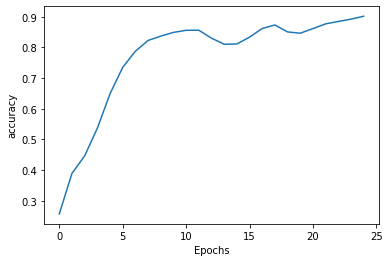

In [11]:
plot_graphs(history, 'accuracy')

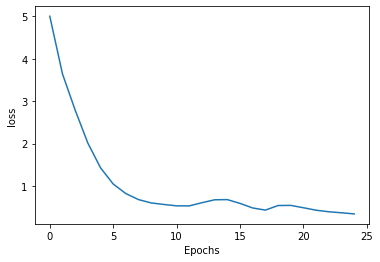

In [12]:
plot_graphs(history, 'loss')

In [13]:
datos_predecir=pd.read_csv("/content/drive/My Drive/DataSet/Palabras_predecir.csv",sep=',')
datos_predecir.head()

,id,texto_predecir,siguientes_palabras,texto
0,1,notebook,4,NaN
1,2,aspiradora,3,NaN
2,3,telefono,5,NaN
3,4,vino,5,NaN
4,5,set,4,NaN


In [14]:
def function(texto_predecir,siguientes_palabras):
  for _ in range(siguientes_palabras):
    token_list = tokenizer.texts_to_sequences([texto_predecir])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predict_x=model.predict(token_list)
    classes_x=np.argmax(predict_x,axis=1)
    output_word = ''
    for word, index in tokenizer.word_index.items():
        if index == classes_x:
            output_word = word
            break
    texto_predecir += " " + output_word
  print(texto_predecir)

for i in range(len(datos_predecir.axes[0])):
  texto_predecir = datos_predecir['texto_predecir'].astype(str)
  siguientes_palabras = datos_predecir['siguientes_palabras'].astype(int)
  function(texto_predecir[i],siguientes_palabras[i])
  i=i+1



notebook dell inspiron 3501 bajó
aspiradora robot osoji dojosan
telefono de 2 cargadores usb tipo
vino chardonnay castillo de molina gran
set de 5 cuchillos master
zapatillas puremotion se


In [16]:
function("Apple",2)

Apple watch s7
